In [61]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

from skimage.segmentation import clear_border
img = cv.imread('matricula_4.jpeg')
img_gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

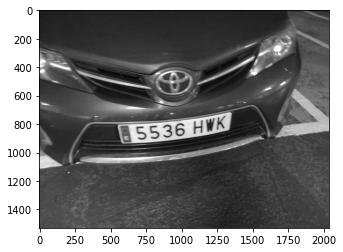

In [62]:
plt.imshow(img_gris,cmap="gray")

In [63]:
kernel = np.ones((3,3), np.uint8)

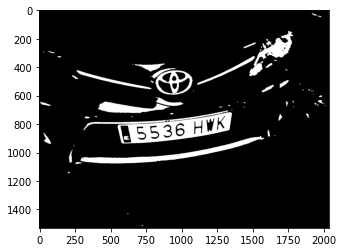

In [64]:
median = cv.medianBlur(img_gris, 3)
ret, th = cv.threshold(median, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
kernel = np.ones((5,5), np.uint8)
opening = cv.morphologyEx(th, cv.MORPH_OPEN, kernel)
edge_touching_removed = clear_border(opening)
contours, hierarchy = cv.findContours(edge_touching_removed, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
plt.imshow(edge_touching_removed, cmap="gray")



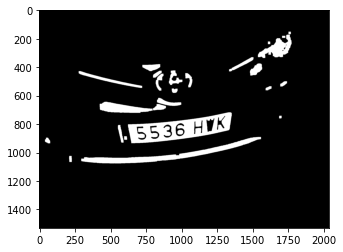

In [78]:
img_erosion = cv.erode(edge_touching_removed, kernel, iterations=7)
img_dilation = cv.dilate(img_erosion, kernel, iterations=7)
plt.imshow(img_dilation, cmap="gray")

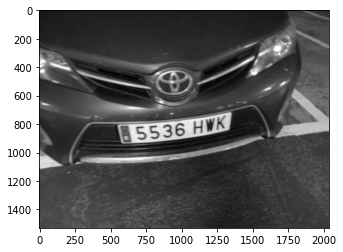

In [65]:
img_gau = cv.GaussianBlur(img_gris, (13,13),0)
plt.imshow(img_gau, cmap="gray")

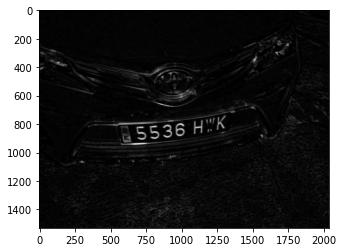

In [66]:
kernel=np.ones((3,3),np.uint8)
top_hat=cv.morphologyEx(img_gris,cv.MORPH_BLACKHAT,kernel,iterations=10)
plt.imshow(top_hat, cmap="gray")